In [1]:
# Make sure we've got the latest version of fastai:
!pip install -Uqq fastai

In [2]:
from fastai.vision.all import *

## 1. Get Data

In [3]:
path = Path("/kaggle/input/ml4eo-crop-classification-challenge-slack")
trn_path = path/"train/train"
test_path = path/"test/test"
trn_path,test_path

(Path('/kaggle/input/ml4eo-crop-classification-challenge-slack/train/train'),
 Path('/kaggle/input/ml4eo-crop-classification-challenge-slack/test/test'))

In [4]:
# Load image Files
files = get_image_files(trn_path)

In [5]:
# Check sizes of images
sizes = [PILImage.create(o).size for o in files[:100]]
pd.Series(sizes).unique() 

array([(200, 200)], dtype=object)

It seems like all of our images are of same size (200,200)

# 2. Get Dataloaders

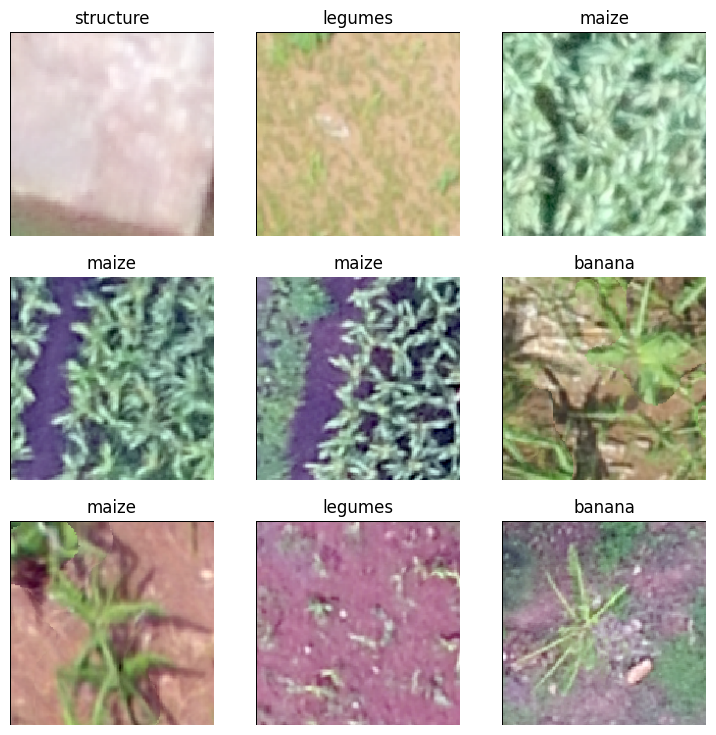

In [6]:
dls = ImageDataLoaders.from_folder(trn_path,valid_pct=0.2)
dls.show_batch()

In [7]:
dls.vocab = ['legumes','maize','banana','forest','other','structure'] # changing the order of vocab according to guideline
dls.vocab

['legumes', 'maize', 'banana', 'forest', 'other', 'structure']

## 3. Get a pre-trained model

In [8]:
metric = F1Score(average="micro")

In [9]:
learn = vision_learner(dls,'convnext_small',metrics=metric)

model.safetensors:   0%|          | 0.00/201M [00:00<?, ?B/s]

In [10]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,f1_score,time
0,1.116866,0.579758,0.834302,01:03


epoch,train_loss,valid_loss,f1_score,time
0,0.525261,0.457184,0.863372,01:56
1,0.413099,0.420251,0.875969,01:56
2,0.288918,0.379708,0.889535,01:56
3,0.181627,0.366137,0.895349,01:56
4,0.107777,0.376304,0.903101,01:56


In [11]:
test_files = get_image_files(test_path)
test_files.sort()

In [12]:
test_dl = dls.test_dl(test_files)

In [13]:
preds = learn.get_preds(dl=test_dl,with_decoded=True)

In [14]:
probs,_,idxs=preds

In [15]:
results_dict=dict(enumerate(idxs.numpy()))


In [16]:
results = pd.DataFrame(results_dict.items(),columns=["ID","Label"])
results.head()

,ID,Label
0,0,2
1,1,3
2,2,3
3,3,1
4,4,5


In [17]:
results.to_csv('submission.csv',index=False)

In [18]:
learn.path = Path('/kaggle/working/')

In [19]:
learn.export('conv_sm_5.pkl')